# Tâche 8

In [62]:
# les imports
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter

import matplotlib.pyplot as plt
import numpy as np


## 1. Télécharger la structure de bandes électroniques du matériau qui vous a été attribué.

In [63]:
# Téléchargement de la structure

with MPRester(api_key = "msKcAm8eGLQeLLbWk7xJ") as m:
    # !!! je me suis connectée sur l'ancien site de materials project j'ai donc une autre API-key que celle enregistrée au debut du quadri!!! !!!    
    band_struct = m.get_bandstructure_by_material_id("mp-961687")

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

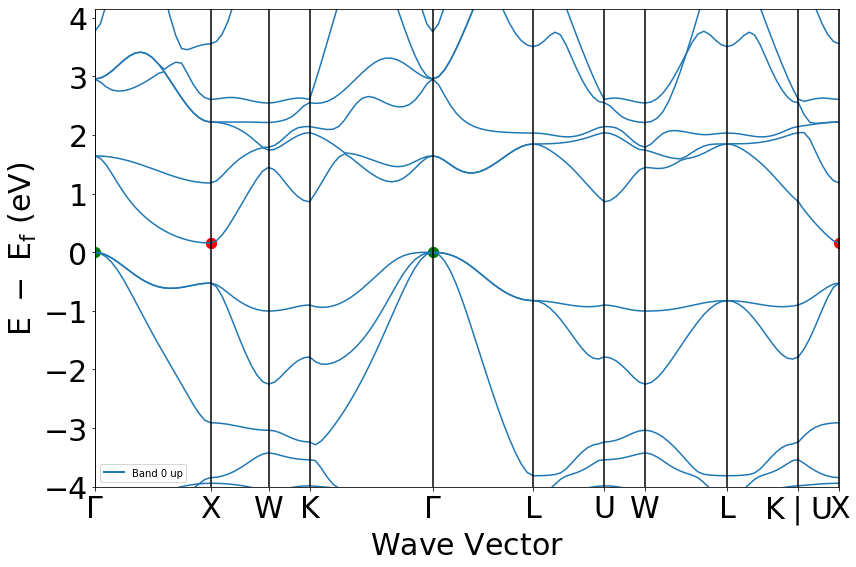

In [64]:
# Visualisation de la stucture

plot = BSPlotter(band_struct)
plot.get_plot(vbm_cbm_marker=True)

## 2. Déterminer la bande interdite.

Energie de la bande interdite: 0.15669999999999984 eV.
La bande interdite est indirecte.
Vecteur de transition : \Gamma-X


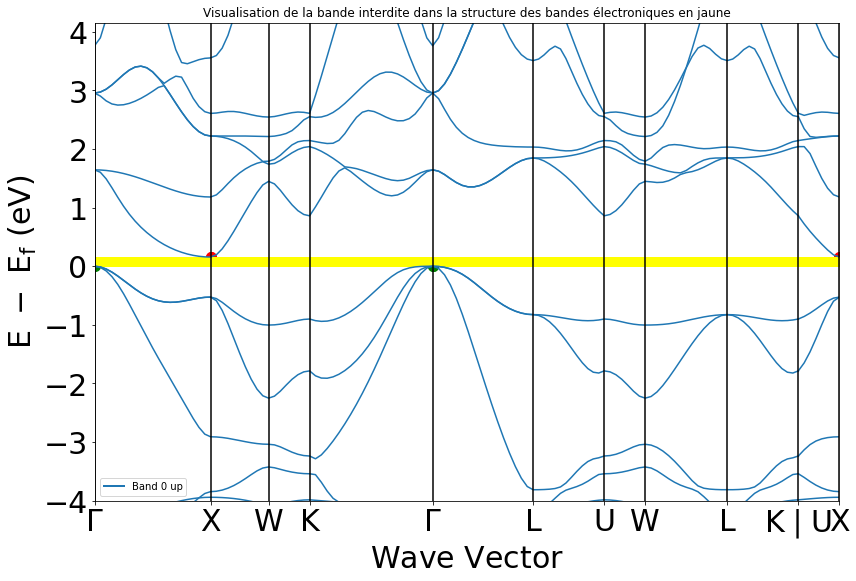

In [65]:
### Récupérer les données des bandes électroniques 
band_gap = band_struct.get_band_gap()

# Energie bande interdite
band_e = band_gap.get('energy')
print('Energie de la bande interdite:', band_e, 'eV.')

# Bande directe ou indirecte
band_direct = band_gap.get('direct')
if band_direct == False:
    print('La bande interdite est indirecte.')
else:
    print('La bande interdite est directe.')

# Vecteur de transition
band_transition = band_gap.get("transition")
print("Vecteur de transition :", band_transition)


### Visualisation de la bande interdite 
bs_plot_data = BSPlotter(band_struct).bs_plot_data()
dist = bs_plot_data.get('ticks').get('distance')
BSPlotter(band_struct).get_plot(vbm_cbm_marker=True)

plt.title('Visualisation de la bande interdite dans la structure des bandes électroniques en jaune')
plt.fill_between(np.linspace(dist[0], dist[-1], 500), 0, band_e, color = "yellow")




## 3. Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.

### 3.1. Première bande de conduction

In [66]:
# Energie zéro
E_0 = bs_plot_data.get('zero_energy')
print("Energie 0 = {} eV \n".format(E_0))

# Recherche de la première bande de conduction
band_cbm = band_struct.get_cbm()
cbm_index = band_cbm["band_index"]
cbm_E = band_cbm["energy"]
cbm_kpoint = band_cbm["kpoint"].cart_coords

# On imprime
print('Energie de la première bande de conduction = ', cbm_E,'eV')
print("Différence d'énergie: E-Ef (eV) = ", (cbm_E - E_0))
print('Vecteur k (coordonnées cartésiennes) =', cbm_kpoint)
print("Index de la première bande de conduction = ", cbm_index)

Energie 0 = 5.9345 eV 

Energie de la première bande de conduction =  6.0912 eV
Différence d'énergie: E-Ef (eV) =  0.15669999999999984
Vecteur k (coordonnées cartésiennes) = [ 5.55111512e-17  9.80922197e-01 -1.11022302e-16]
Index de la première bande de conduction =  defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})


On voit que c'est la 18 ème bande qui contient la plus basse énergie de la bande de conduction.

### 3.2. Dernière bande de valence

In [67]:
# Recherche de la dernière bande de valence
band_vbm = band_struct.get_vbm()
vbm_index = band_vbm["band_index"]
vbm_E = band_vbm['energy']
vbm_kpoint = band_vbm['kpoint'].cart_coords

# On imprime
print('Energie de la dernière bande de valence = ', vbm_E,'eV')
print("Différence d'énergie: E-Ef (eV) = ", (vbm_E - E_0))
print('Vecteur k (coordonnées cartésiennes) =', vbm_kpoint)
print("Index de la première bande de conduction = ", vbm_index)

Energie de la dernière bande de valence =  5.9345 eV
Différence d'énergie: E-Ef (eV) =  0.0
Vecteur k (coordonnées cartésiennes) = [0. 0. 0.]
Index de la première bande de conduction =  defaultdict(<class 'list'>, {<Spin.up: 1>: [15, 16, 17]})


On voit que les bandes 15, 16 et 17 sont les bandes qui contiennent la plus grande énergie dans la bande de valence. 

### 3.3 Calcul de la pus grande (petite) dispersion.

Dispersion maximale dans la bande de valence:  1.0795587242701437
Elle est représentée par la flèche rouge sur le graphe. 

Dispersion minimale dans la bande de valence:  0.12502294967083524
Elle est représenté par la flèche verte sur le graphe.

Dispersion maximale dans la bande de conduction:  2.632216916012612
Elle est représentée par la flèche bleue sur le graphe.

Dispersion minimale dans la bande de conduction:  0.23790365794703833
Elle est représenté par la flèche jaune sur le graphe.



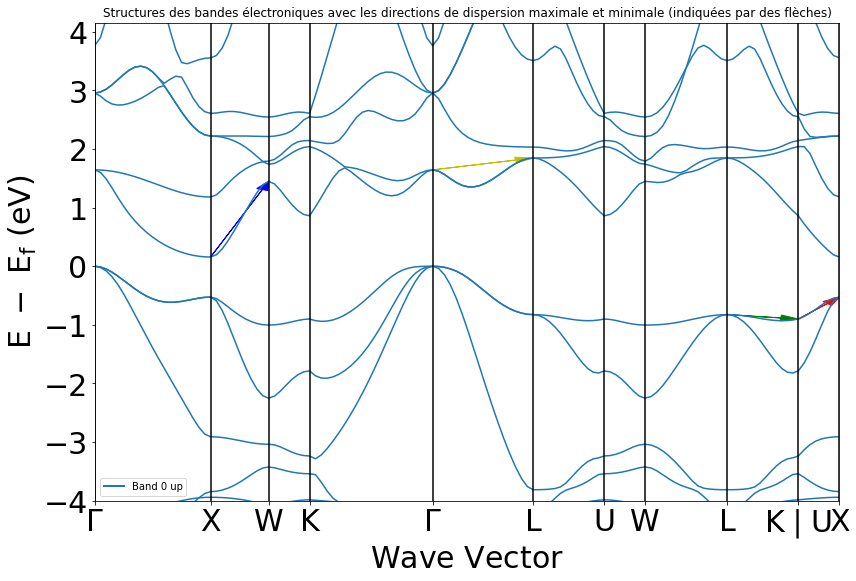

In [68]:
# Calcul des pentes

x_dist = bs_plot_data.get('ticks').get('distance')
x = np.unique(x_dist)
y_E = bs_plot_data.get('energy').get("1")

dx = np.zeros(10)
dy_cond = np.zeros(10)
dy_val = np.zeros(10)

slope_c = np.zeros(10)
slope_v = np.zeros(10)

val_index = 17
cond_index = 18

for i in range(10):
    dx[i] = x[i+1] - x[i]
    
for i in range(10):
    dy_val[i] = y_E[i][val_index][-1] - y_E[i][val_index][0]
    dy_cond[i] = y_E[i][cond_index][-1] - y_E[i][cond_index][0]
    
for i in range (10):
    slope_c[i] = dy_cond[i]/dx[i]
    slope_v[i] = dy_val[i]/dx[i] 
    
# Valeurs min/max de la dispertion des bandes de conduction/valence
    
print("Dispersion maximale dans la bande de valence: ",np.max(abs(slope_v)))
print("Elle est représentée par la flèche rouge sur le graphe. \n")
print("Dispersion minimale dans la bande de valence: ",np.min(abs(slope_v)))
print("Elle est représenté par la flèche verte sur le graphe.\n")
print("Dispersion maximale dans la bande de conduction: ",np.max(abs(slope_c)))
print("Elle est représentée par la flèche bleue sur le graphe.\n")
print("Dispersion minimale dans la bande de conduction: ",np.min(abs(slope_c)))
print("Elle est représenté par la flèche jaune sur le graphe.\n")

# Index pour les valeurs min/max de la dispertion des bandes de conduction/valence

max_val = np.argmax(abs(slope_v))
min_val = np.argmin(abs(slope_v))
max_cond = np.argmax(abs(slope_c))
min_cond = np.argmin(abs(slope_c))

# Visualisation

BSPlotter(band_struct).get_plot()
plt.title("Structures des bandes électroniques avec les directions de dispersion maximale et minimale (indiquées par des flèches)")
plt.arrow(x[max_val], (y_E[max_val][val_index])[0], dx[max_val], dy_val[max_val], color = 'r', head_width = 0.1,length_includes_head=True) #dispersion max de bande de valence
plt.arrow(x[min_val], (y_E[min_val][val_index])[0], dx[min_val], dy_val[min_val], color = 'g', head_width = 0.1,length_includes_head=True) #dispersion min de bande de valence
plt.arrow(x[max_cond], (y_E[max_cond][cond_index])[0], dx[max_cond], dy_cond[max_cond], color = 'b', head_width = 0.1,length_includes_head=True) #dispersion max de bande de conduction
plt.arrow(x[min_cond], (y_E[min_cond][cond_index])[0], dx[min_cond], dy_cond[min_cond], color = 'y', head_width = 0.1,length_includes_head=True) #dispersion max de bande de conduction
plt.show()

## 4. Calculer la masse effective.

On va utiliser cette formule: 
$$ m^{*} = \frac{\hbar^{2} \cdot k^{2}} {2 \cdot E(k)} = \frac{\hbar^{2} \cdot (k_{x}^{2}+k_{y}^{2}+k_{z}^{2})}{2 \cdot E(k)} $$

### 4.1. Au sommet de la bande de valence.

In [69]:
#Constantes h _barre (de Plank) en [eV]

h_barre = 6.582119570e-16 

vbm_me = (h_barre**2 * (vbm_kpoint[0]**2+vbm_kpoint[1]**2+vbm_kpoint[2]**2))/(2*abs(vbm_E))

### 4.2. A la base de la bande de conduction.

In [70]:
cbm_me = (h_barre**2 * (cbm_kpoint[0]**2+cbm_kpoint[1]**2+cbm_kpoint[2]**2))/(2*abs(cbm_E))

print("En supposant l'hypothèse d'une dispersion parabolique dans les deux cas. \n")
print("Masse effective au sommet de la dernière bande de valence : {} kg".format(vbm_me))
print("Masse effective à la base de la première bande de conduction : {} kg".format(cbm_me))

En supposant l'hypothèse d'une dispersion parabolique dans les deux cas. 

Masse effective au sommet de la dernière bande de valence : 0.0 kg
Masse effective à la base de la première bande de conduction : 3.421903861546439e-32 kg


Etrange cette valeur de 0kg.